In [3]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [1]:
import rarfile
import os
import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.utils import make_grid
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from torch.utils.data import  TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import math
from sklearn.preprocessing import StandardScaler

In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [4]:
transform = transforms.Compose([
     transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
batch_size = 100

In [5]:
data_dir = "SignalData"

In [6]:
train_dataset = datasets.ImageFolder(root=os.path.join(data_dir, 'train_spectrograms1'), transform=transform)

# Load the testing dataset
test_dataset = datasets.ImageFolder(root=os.path.join(data_dir, 'test_spectrograms1'), transform=transform)

In [7]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [8]:
for X_train, y_train in train_loader:
    pass

In [9]:
y_true=[]
for X_test, y_test in test_loader:
    output=y_test
    y_true.append(output)

In [11]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # self.conv1 = nn.Conv2d(3, 32, kernel_size=2, padding=1)
        # self.pool1 = nn.MaxPool2d(2)
        # self.conv2 = nn.Conv2d(32, 64, kernel_size=2, padding=1)
        # self.pool2 = nn.MaxPool2d(2)
        # self.kan1 = KANLinear(64*32*32, 256)
        # self.kan2 = KANLinear(256, 6)

        # self.conv1 = nn.Conv2d(3, 32, kernel_size=2, padding=1)
        # self.cbn1=nn.BatchNorm2d(32)
        # self.pool1 = nn.MaxPool2d(2)
        # self.conv2 = nn.Conv2d(32, 64, kernel_size=2, padding=1)
        # self.cbn2=nn.BatchNorm2d(64)
        # self.pool2 = nn.MaxPool2d(2)
        # self.conv3 = nn.Conv2d(64, 128, kernel_size=2, padding=1)
        # self.cbn3=nn.BatchNorm2d(128)
        # self.pool3 = nn.MaxPool2d(2)
        # self.kan1 = KANLinear(128*16*16, 256)
        # self.kan2 = KANLinear(256, 64)
        # self.kan3=KANLinear(64,6)

        self.conv1 = nn.Conv2d(3, 32, kernel_size=2, padding=1)
        self.cbn1=nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=2, padding=1)
        self.cbn2=nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=2, padding=1)
        self.cbn3=nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(128*16*16, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3=nn.Linear(64,6)

    def forward(self, x):
        x = F.selu(self.conv1(x))
        x=self.cbn1(x)
        x = self.pool1(x)
        x = F.selu(self.conv2(x))
        x=self.cbn2(x)
        x = self.pool2(x)
        x=F.selu(self.conv3(x))
        x=self.cbn3(x)
        x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x=self.fc3(x)
        return x

In [12]:
model=CNN()

In [13]:
model

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (cbn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (cbn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (cbn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=6, bias=True)
)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [15]:
num_epochs = 1

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/1, Loss: 7.8587


In [16]:
model.eval()
correct = 0
total = 0
predicted_label=[]
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        print(predicted)
        print(y_batch)
        print("")
        predicted_label.append(predicted)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

tensor([0, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 3, 1, 0, 1, 3, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

tensor([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 3, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 3, 1, 1, 1, 0, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1])

tensor([3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1,
        1, 3, 3, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

tensor([1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1,
        1, 1, 3, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2])

tensor([1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 1, 1,
        1, 1

In [17]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

In [18]:
predicted_label=torch.cat(predicted_label)

In [19]:
y_true=torch.cat(y_true)

In [20]:
cm=confusion_matrix(y_true,predicted_label)

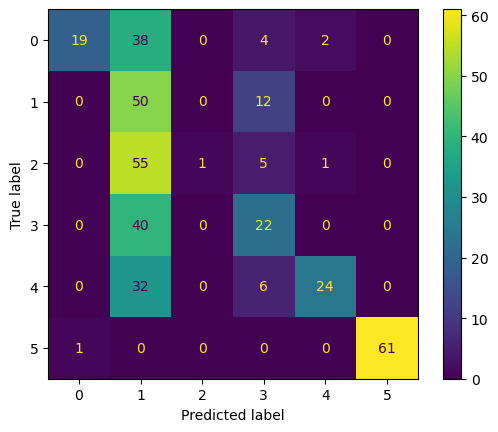

In [21]:
ConfusionMatrixDisplay(cm).plot()

In [22]:
print(classification_report(y_true,predicted_label))

              precision    recall  f1-score   support

           0       0.95      0.30      0.46        63
           1       0.23      0.81      0.36        62
           2       1.00      0.02      0.03        62
           3       0.45      0.35      0.40        62
           4       0.89      0.39      0.54        62
           5       1.00      0.98      0.99        62

    accuracy                           0.47       373
   macro avg       0.75      0.47      0.46       373
weighted avg       0.75      0.47      0.46       373

